## Exploring ML Data Set

Data manipulation capabilities of pandas are built on top of the numpy library, in a way that numpy is a dependency of pandas library.

In [1]:
%pip install pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


The dataset we are using is from the UCI Machine Learning Repository called **[Adult](https://archive.ics.uci.edu/dataset/2/adult)**. The dataset is used to predict whether annual income of an individual exceeds $50K/yr based on census data, also known as "Census Income" dataset. 

In [3]:
#load the data
train  = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
#check train data set
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Train data has 32561 rows and 15 columns (RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns)). 6 of the 15 columns have interger classes and the remaining 9 columns have class objects. 

For example, for the column "workclass" only 30725 rows do not contain null values thus "non-null" definition and the remaining rows may contain "NaN" or "null" values. 

Similary, the test dataset below has 15 columns and 16280 rows. 6 out of 15 columns contain integers and 9 contain object class.

In [5]:
#check test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education.num   16281 non-null  int64 
 5   marital.status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital.gain    16281 non-null  int64 
 11  capital.loss    16281 non-null  int64 
 12  hours.per.week  16281 non-null  int64 
 13  native.country  16007 non-null  object
 14  target          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


We can also check the size (rows and columns) of the dataset using the pandas function ".shape"

In [6]:
print ("The train data has",train.shape)
print ("The test data has",test.shape)

The train data has (32561, 15)
The test data has (16281, 15)


Lets view the first 5 rows of the train dataset using the ".head()" pandas function.

In [7]:
train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
test.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


To check if there are any missing values in a dataset, we use the .isnull() function in pandas. This function helps us identify where values are missing, which is the first step in handling them effectively. We handle missing values because they can cause significant problems when analyzing or modeling data. 

For example, ML models cannot train on missing data, which often results in errors during model fitting or leads to inaccurate and biased predictions. Inconsistent or incomplete data can also distort summary statistics, impact visualizations, and reduce the reliability of insights drawn from the data

Cleaning missing data helps ensure accuracy, consistency, and better performance of any data analysis or predictive models. There are several strategies to handle missing values:

- One common approach is to remove rows or columns with missing values using the ".dropna()" function. This is acceptable when the proportion of missing data is small and its removal does not significantly reduce the overall size or diversity of the dataset.

- When missing values occur more frequently or are in important columns, imputation is often a better option. This involves filling in missing values with substituted ones, such as the mean, median, or mode of the column.

In [9]:
# Check number of missing values in train and test datasets:

print(f'{train.shape[0] - train.dropna().shape[0]} rows has missing values, linked to these columns:\n {train.isnull().sum()}')
print('**********************************************************************')
print(f'{test.shape[0] - test.dropna().shape[0]} rows has missing values, linked to these columns:\n {test.isnull().sum()}')

2399 rows has missing values, linked to these columns:
 age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
target               0
dtype: int64
**********************************************************************
1221 rows has missing values, linked to these columns:
 age                 0
workclass         963
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        966
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    274
target              0
dtype: int64


We can see above, for the training dataset, the column workclass has 1836 missing values, similary to the testing dataset, it has 963 missing values for the same class. We can observe the columns with missing data extra. Firstly by checking the unique values. 

In [10]:
cat = train.select_dtypes(include=['O']) # This filters the train dataframe and selects only the columns with object data type
cat.apply(pd.Series.nunique) # pd.Series.nunique counts the number of unique values in a column

workclass          8
education         16
marital.status     7
occupation        14
relationship       6
race               5
sex                2
native.country    41
target             2
dtype: int64

For categorical columns it's common to fill missing values with the most frequent category (mode). In our case, we followed this approach, replacing the missing values with the most frequest values. 

For example for the category "workclass" in train dataframe, "Private" is the most frequently used value than others, thus we will replace the null values with "Private". 

In [11]:
train.workclass.value_counts(sort=True)


workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [12]:
#Education
train.workclass.value_counts(sort=True)
train.workclass.fillna('Private',inplace=True)

test.workclass.value_counts(sort=True)
test.workclass.fillna('Private',inplace=True)

#Occupation
train.occupation.value_counts(sort=True)
train.occupation.fillna('Prof-specialty',inplace=True)

test.occupation.value_counts(sort=True)
test.occupation.fillna('Prof-specialty',inplace=True)

#Native Country
train['native.country'].value_counts(sort=True)
train['native.country'].fillna('United-States',inplace=True)

test['native.country'].value_counts(sort=True)
test['native.country'].fillna('United-States',inplace=True)

Checking the train dataframe for null vaules

In [13]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
target            0
dtype: int64

In [14]:
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
target            0
dtype: int64

We will check the target vairable to see if the data is imbalanced or not

In [15]:
#check proportion of target variable
train.target.value_counts()/train.shape[0]

target
<=50K    0.75919
>50K     0.24081
Name: count, dtype: float64

We see that 75% of the data set belongs to <=50K class, meaning if we take a rough guess of target prediction as <=50K, we'll get 75% accuracy.

In [16]:
pd.crosstab(train.education, train.target,margins=True)/train.shape[0]

target,<=50K,>50K,All
education,,,
10th,0.026750,0.001904,0.028654
11th,0.034243,0.001843,0.036086
12th,0.012285,0.001013,0.013298
1st-4th,0.004975,0.000184,0.005160
5th-6th,0.009736,0.000491,0.010227
7th-8th,0.018611,0.001228,0.019840
9th,0.014957,0.000829,0.015786
Assoc-acdm,0.024631,0.008139,0.032769
Assoc-voc,0.031357,0.011087,0.042443


When we cross-reference our target with education column, we can see that out of 75% people with <=50K salary, 27% people are high school graduates and 18% people are in some-colleg, which is correct as people with lower levels of education are expected to earn less. On the other hand, out of 25% people with >=50K salary, 6% are bachelors and 5% are high-school grads.

In [17]:
pd.crosstab(train.occupation, train.target,margins=True)/train.shape[0]

target,<=50K,>50K,All
occupation,,,
Adm-clerical,0.100212,0.015571,0.115783
Armed-Forces,0.000246,0.000031,0.000276
Craft-repair,0.097356,0.028531,0.125887
Exec-managerial,0.064433,0.060440,0.124873
Farming-fishing,0.026995,0.003532,0.030527
Handlers-cleaners,0.039434,0.002641,0.042075
Machine-op-inspct,0.053807,0.007678,0.061485
Other-service,0.096987,0.004207,0.101195
Priv-house-serv,0.004545,0.000031,0.004576


Cross-referencing our target with occupation, we can see that of the 75% of people with <=50K salary, 10% work as Adm-clerical, and 9% as Craft-repair and other services. On the other hand, out of 25% people with >=50K salary, 6% work as Exec-managerials and 5% work as Prof-speciality.

Now, this pattern seems to be a matter of concern. That's why we'll have to consider more variables before coming to a conclusion.



## ML model

Before building the model, we will use a label-encoder technique, that will encode each unique value of a variable with a numerical value. 

We will be using the skit-learns lable encoding function, where will be training the encoder to learn all the unique catergories of object class, and transform them into numeric values. 


For example, for target <=50k it will assign label 0 and tagert >50k it will assign 1. 

In [18]:
#load sklearn and encode all object type variables
from sklearn import preprocessing

def preprocessing_function(df):
    for x in df.columns:
        if df[x].dtype == 'object': # only acts on columns that are of type object
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(df[x].values)) # trains the encoder to learn all unique categories in the column.
            df[x] = lbl.transform(list(df[x].values)) # replaces the original column with the encoded numeric values.
    return df

In [19]:
train = preprocessing_function(train)
train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [20]:
test = preprocessing_function(test)
test.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,37,1
4,18,8,103497,15,10,4,14,3,4,0,0,0,30,37,0


## Building a Random Forest Model


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

y = train['target']
del train['target'] # removing the target from the training dataset
X = train
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y) # 70 % for training and 30% for val

# Train the RF classifier
clf = RandomForestClassifier(n_estimators = 500, max_depth = 6)
clf.fit(X_train,y_train)


# Evaluate on validation set
val_preds = clf.predict(X_val)
val_acc = accuracy_score(y_val, val_preds)
print(f"Validation Accuracy: {val_acc:.4f}")

Validation Accuracy: 0.8514


Now, let's make prediction on the test set and check the model's accuracy.

In [22]:
# making a predictions on testing dataset and calculating the accuracy by comparing predicted labels vs actual ones
y_test = test['target']
del test['target']
X_test = test

prediction = clf.predict(X_test)
acc =  accuracy_score(np.array(y_test),prediction)
print(f'The accuracy of Random Forest is {acc:.4f}')

The accuracy of Random Forest is 0.8538


As we can see, Random Forest model obtained an accuracy of 85%, comparing the predicted labels to the ground-truth values, for both the validation and testing datasets.

We can also visualize which features the Random Forest model thinks are the most important in making predictions using ".feature_importances_" attribute of the trained model. This attribute provides a score for each feature, indicating its relative importance.

It returns a list of numbers, one for each feature where higher values represent more important features. All the scores sum up to 1.

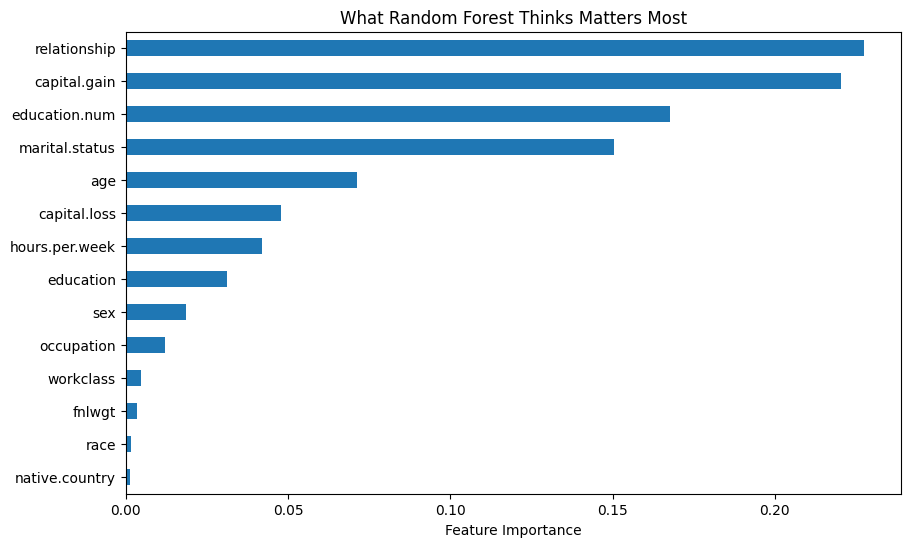

In [23]:
import matplotlib.pyplot as plt

importances = clf.feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features)
feat_imp.sort_values().plot(kind='barh', figsize=(10,6))
plt.xlabel("Feature Importance")
plt.title("What Random Forest Thinks Matters Most")
plt.show()


For this notebook, I followed the [data manipulation tutorial](https://www.hackerearth.com/practice/machine-learning/data-manipulation-visualisation-r-python/tutorial-data-manipulation-numpy-pandas-python/tutorial/) from HackerEarth.